# Table of Contents
---
1. [Introduction](#intro)

  * Problem Statement
  * Sentiments Description
---
2. [Imports](#data)
  * Comet
  * Installations
  * Packages 
  * Data
---
3. [Explonatory Data Analysis](#EDA)

3.1. Missing values and blanks 
  
3.2. Data Summary statistics
  
3.3. Sentiment Visual Distributions
   * Percentages of each Sentiments 
   * Tweets per sentiment 
   * Number of words per tweet
   * Word Cloud 
   * Mentions
   * Hashtags 
   * Url Counts
   * Retweets
   * Name Entities 
---
4. [Data Preprocessing](#data)
  * Remove Contractions
  * Remove Non-english tweets 
  * Clean tweets 
  * Lemmatization
  * Converting HTML Entities
---
5. [Analysis of cleaned Data]()
  * Word Cloud 
  * NER
---
6. [Feature Engineering]()
  * Classification Models 
  * Validation split
  * Pipeline
---
7. [modeling]()
  * Training the model 
  * F1 score Results 
  * Testing on cleaned data
---
8. [Resampling]()
  * Smote
  * Downsampling 
  * Testing on resampled Data
---
9. [Hyperparameter Tuning]()
  * Linear SVC
---
10. [Final Model Testing]()
---
11. [Submission]()
---
12. [Conclusion]()
---
13. [Acknowlegement]()
---

# 1. Introduction

![](https://3c1703fe8d.site.internapcdn.net/newman/csz/news/800/2019/6-climatechange.jpg)

### Climate change project description 

Many companies offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. Twitter has become one of the most cost-effective maketing strategy platforms used by companies as way of engaging with consumers.
This notebook describes the process to classifying tweets by sentiment using Natural Language Processing techniques.
It describes the initial data exploration, as well as implementation of different machine model classifiers used for predictions .

This will be done by importing necesarry libraries as well as the training and test datasets. Data cleaning follows together with exploratory data analysis.We then wrap up the notebook by diving into different classification techniques under the Modelling section which will be followed by insights and a conclusion.

Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.

### Problem statement
Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment

  ### Sentiment Discription
  
        Class   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

 # 2. Imports

### a Comet 

* Install Comet
* Import Experiment from Comet
* Create an experiment instance

In [1]:
pip install comet_ml

     |████████████████████████████████| 227 kB 424 kB/s 
     |████████████████████████████████| 504 kB 2.7 MB/s 
  Created wheel for netifaces: filename=netifaces-0.10.9-cp37-cp37m-linux_x86_64.whl size=37310 sha256=7151ff0560a41e1c8602ba7e7fb0f0424c4c37b3edb936c6b4906e1aae89f0b1
  Stored in directory: /root/.cache/pip/wheels/5f/09/cf/2b1aa8371c071fa89518ac0bbda1b8cca4e65b6e2538af4192
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=c170dd13e4cc747ff871b3cf9048a8ea28a6a264b5bcd63216dbeb7433fe77fc
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built netifaces configobj
Note: you may need to restart the kernel to use updated packages.


In [2]:
from comet_ml import Experiment

In [3]:
# Create an experiment with the comet generated api key:
experiment = Experiment(
    api_key="<API key here>",
    project_name="team_6_classification",
    workspace="mokai1701",
)

COMET ERROR: The given API key <API key here> is invalid, please check it against the dashboard. Your experiment would not be logged 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors/


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-edsa2020-21/sample_submission.csv
/kaggle/input/climate-change-edsa2020-21/test.csv
/kaggle/input/climate-change-edsa2020-21/train.csv


### b Packages 

In [5]:
pip install langdetect

     |████████████████████████████████| 981 kB 422 kB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=99ff40cd613ab7c6502baed8f4b4a06af58538793618bfbb4ceceef3794bbf49
  Stored in directory: /root/.cache/pip/wheels/59/f6/9d/85068904dba861c0b9af74e286265a08da438748ee5ae56067
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install fasttext

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
import fasttext
import spacy.cli
from langdetect import detect
import contractions
import unicodedata
import numpy as np
import pandas as pd
import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


---
After importing the dependencies, both the train data and test data are read in. From train dataset and test dataset, pandas methods are used to examine summary statistics such as:

That the correct number of rows and columns have been read in
Account for missing values and correct if there are any missing values
The data types that make up the datasets
The columns that make up the datasets
Pull out tweets from a column to see the typical body/structure of the tweets

---

### Data


Train.csv: Dataset that contains all the variables that should be used to train the model

Test.csv : Dataset that contains variables that will be used to test the model

In [11]:
train = pd.read_csv('/kaggle/input/climate-change-edsa2020-21/train.csv')

test = pd.read_csv('/kaggle/input/climate-change-edsa2020-21/test.csv')

### Variables definitions

Sentiment: Sentiment of tweet

Message: Tweet body

Tweetid: Twitter unique id

# 3. Exploratory Data Analysis 

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.This approach for data analysis uses many tools(mainly graphical to maximize insight into a data set, extract important variables, detect outliers and anomalies, amongst other details that is missed when looking at DataFrame.

This step is very important especially when we model the data in order to apply Machine Learning techniques.

### 3.1 Missing values and blank strings 

In [12]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [13]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [14]:
blanks = []  

for ms in train.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [15]:
blanks = []  

for ms in test.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


**Observation:**
* The training dataset has no null values or any blank tweet rows within it.
* The test data also has no missing values or blank tweet rows

### 3.2 Data summary statisitics

In [16]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [18]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


**Observations:**
* The train and test datasets contains one categorical column called 'message'
* The train dataset contains three columns
* The test data contains two columns, it excluses the predictive (y) column sentiment 
* Some tweets contain twitter handles (e.g @RawStory), numbers (e.g year 2016), hashtags (e.g #TodayinMaker# WIRED) and re-tweets (RT).
* Some tweets contain names of ogarnisations, continents and countries.
* New lines are represented by '\n' in the tweet string.

### 3.3 Sentiment visual distributions

In [20]:
#make a copy of the train dataset

train1 = train.copy()

####  A. The percentage of each sentiment row

The following code will count the number of rows each sentiment has and the total percentage it carries 

#### B. Tweets per Sentiment 

Text(0.5, 1.0, 'Class Distributions')

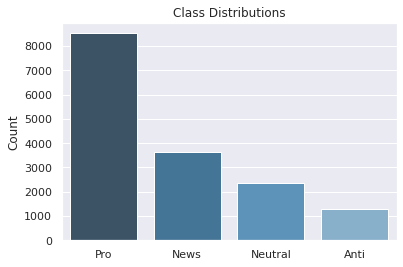

In [21]:
'''
We calculate the number of tweets per Sentiment,

we then plot the class distributions results'''

# Number of tweets per sentiment
class_distribution = pd.DataFrame(list(train1['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, 
           palette="Blues_d")
plt.title('Class Distributions')

**Observations:**
* The sum of the tweets relating to news,neutral and anti is less than half of the total tweets.
* Looking at the distribution we are able to see that the data is imbalanced, most tweets are skewed to the Pro sentiment category supporting the belief of man-made climate change.

#### C. Number of words per tweet

In [22]:
#identify the row we want 
tweet = train['message']

In [23]:
# creating a new DataFrame
tweet_df = pd.DataFrame(tweet)

# Add sentiment column to the tweets dataframe
tweet_df['sentiment'] = train1['sentiment']

tweet_df.head()

,message,sentiment
0,PolySciMajor EPA chief doesn't think carbon di...,1
1,It's not like we lack evidence of anthropogeni...,1
2,RT @RawStory: Researchers say we have three ye...,2
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,1
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",1


In [24]:
'''
We creating a Collection of written text of each sentiment class '''

news_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweet_df['message']
                       [tweet_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweet_df['message']
                           [tweet_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == -1]])

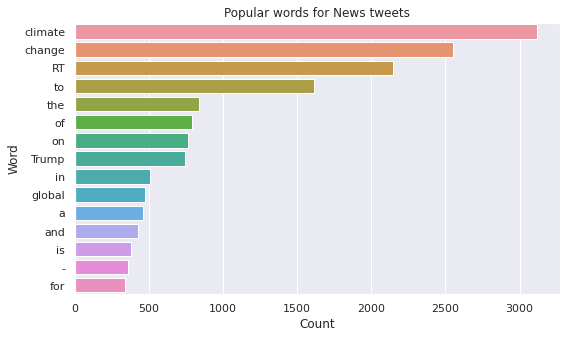

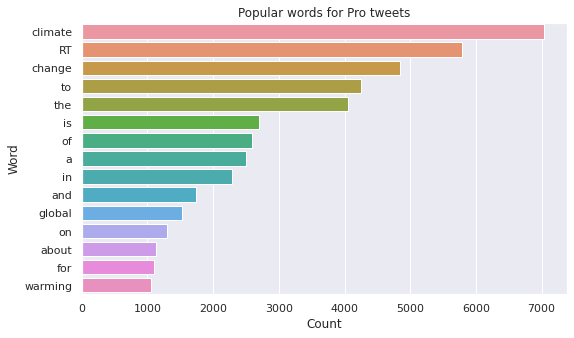

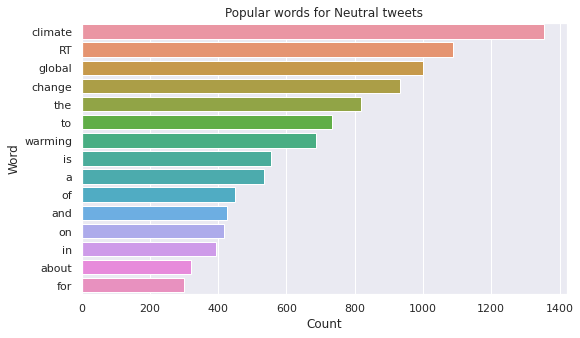

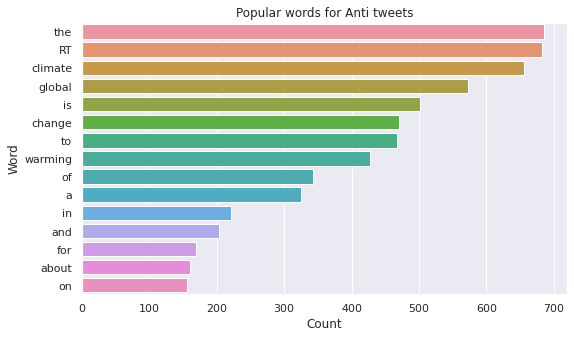

In [25]:
# Visualising sentiment class 
full_title = ['Popular words for News tweets',
              'Popular words for Pro tweets',
              'Popular words for Neutral tweets',
              'Popular words for Anti tweets']
#creating a list for the visuals 
tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [40, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

* The graphs above showcase the evidence of noise. A lot of stop words are picked up as being important which include: (the, to, and, also of). Also, in the graph labeled popular for news tweets, there is a punctuation (a dash -) picked up as an important word.

#### D. Wordcloud

Creating a word cloud to visualizate tweet keywords and text data.
This is to highlight popular or trending terms based on frequency of use and prominence.
The larger the word in the visual the more common the word is on tweet messages.

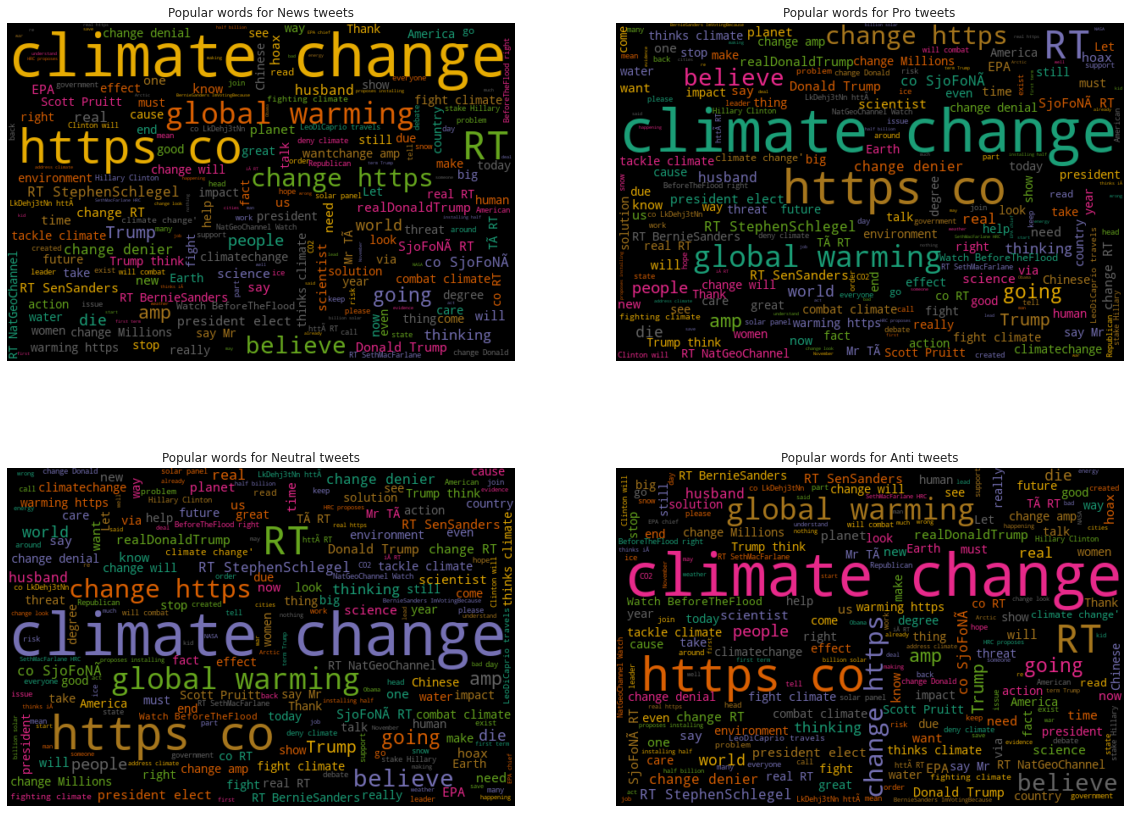

In [26]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=600, height=400, 
               background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

**Observation:**
* The size of the word indicates the relevance in the tweet.
* The most popular words in all four classes are climate change, global warming and belief.
* The pro and anti groups include a number of words that might be expected in each group.
* In the word clouds there is evidence of noisy text which include words such as https, webside, co and RT. These do not assist us in our classification, rather they add noise, we will have another look at it when the noise have been removed.
* https occurs frequently in pro climate change tweets, implying that many links are being shared around the topic of climate change. These could be links to petitions, websites and/or articles related to climate change. Interesting to note: https only occurs in the top 25 words for the pro climate change class. Why aren't we seeing more links in the news class?

#### e. Mention Analysis

A mention is a Tweet that contains another person's username anywhere in the body of the Tweet. We collect these messages, as well as all the replies. Including multiple usernames in a Tweet, all of those people you mentioned will see your Tweet.

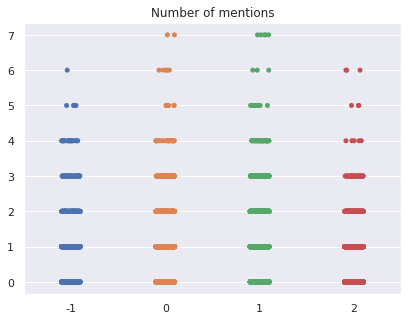

In [27]:
"""
We calculate the number of mentions we have for each sentiment in a tweet
"""

# mention count 
train1['mentions'] = train1['message'].apply(lambda x: len([i for i in str(x) if i == '@']))

#plot the number of mentions
plt.subplot(1,3,3)
sns.stripplot(y='mentions', x='sentiment', data=train1, jitter=True)
plt.title('Number of mentions')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

 **Observation:**

The pro and neutral setiments seem to have the most mentions in the tweets compared to the news and anti sentiment classes. 

#### f. Extracting hashtags

People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet

In [28]:
# Creating a function to extract hashtags from tweets

def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

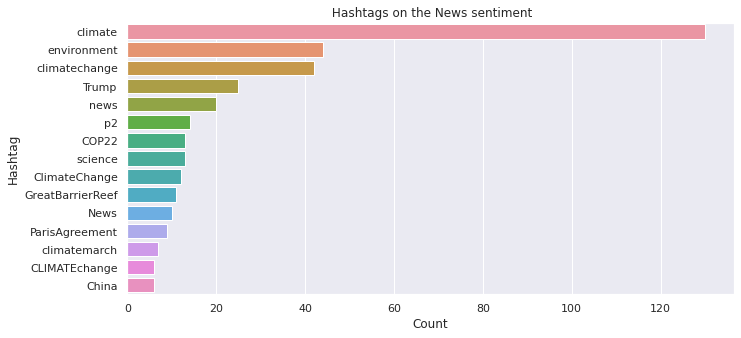

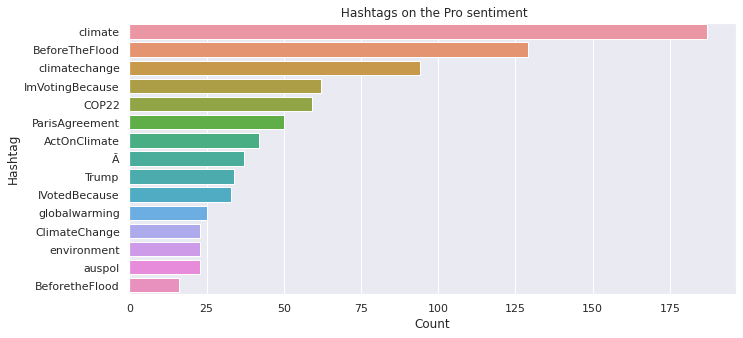

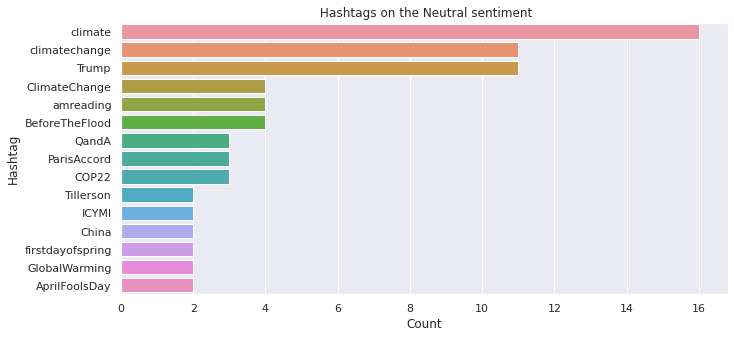

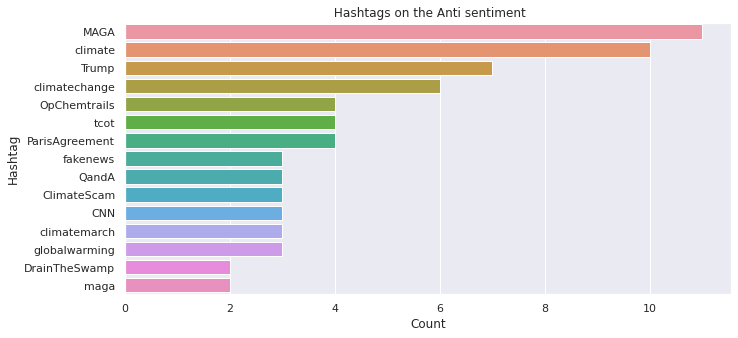

In [29]:
# Extracting hashtags from tweets
news_h = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_h = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_h = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_h = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# hashtag list
hashtags = [sum(news_h, []), sum(pro_h, []),
            sum(neutral_h, []),sum(anti_h, [])]

# Visualising the Hashtags
ft = [' Hashtags on the News sentiment',
              ' Hashtags on the Pro sentiment',
              ' Hashtags on the Neutral sentiment',
              ' Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count')
    plt.title(ft[i])
    plt.show()

**Observation:**

* We can see that the top 5 hashtags have similar words like Climate, climate change, Trump and Before the flood
* Before the flood is a popular hashtags used in pro climate change tweets, this refers to a 2016 documentary where actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions.
* In the anti climate change tweets MAGA (Make America great again) is the top popular hashtag. It is a slogan that was often used by Donald Trump during his campaign for elections in 2016. This soon became a trending hashtag to use to show support for Donald Trump., 

#### g. Url counts 

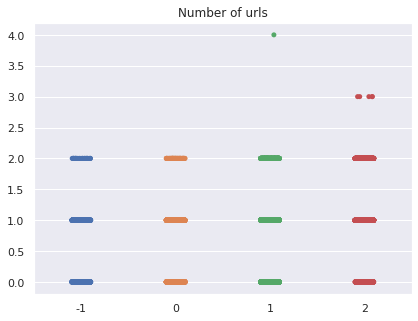

In [30]:
# extracting urls
train1['urls'] = train1['message'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# ploting the number of urls
plt.subplot(1,3,3)
sns.stripplot(y='urls', x='sentiment', data=train1, jitter=True)
plt.title('Number of urls')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

**Observation:**There is not much difference between the number of urls in each setiment. 

### I. Retweets

Twitter allows a user to retweet, or RT another users tweets. We see RT as a popular word in the above visuals. This is great for creating trends, but not useful for sentiment analysis. Now we will remove the duplicates to get a clearer picture of our data set.

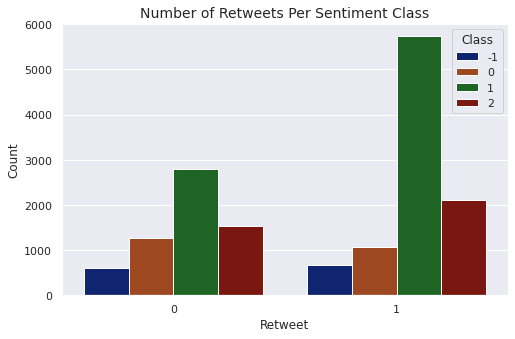

In [31]:
# Class distribution for set of retweeted-tweets and set without retweets
plt.figure(figsize = (8,5))
train1['retweet'] = train1['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
sns.countplot(x='retweet', data=train1, palette='dark', hue='sentiment')
plt.title('Number of Retweets Per Sentiment Class',fontsize=14)
plt.xlabel('Retweet')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

**Observations:**

The Pro sentiment class seems to have more tweets retweeted with over 5000 retweets. while other sentiment classes have less than 2000 retweets. looks like evryone is retweeting positive climate change tweets more than others.

### J. Finding entities 

In [32]:
nlp = spacy.load('en_core_web_sm')

def entities(df):
    df_index = 0

    for tweet in df['message']:
        tweet = nlp(tweet)

    for entity in tweet.ents:
        df.loc[df_index, 'message'] = df.loc[df_index, 'message'].replace(str(entity.text), str(entity.label_))
        df_index += 1

        return df

In [33]:
entities(train)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


### k. Twitter Handles

A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the company they're looking for.

In [34]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

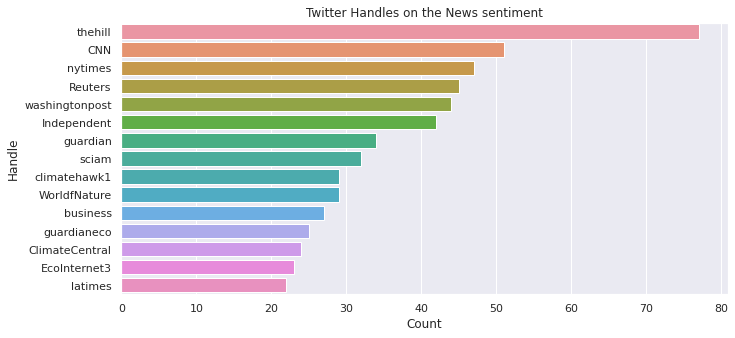

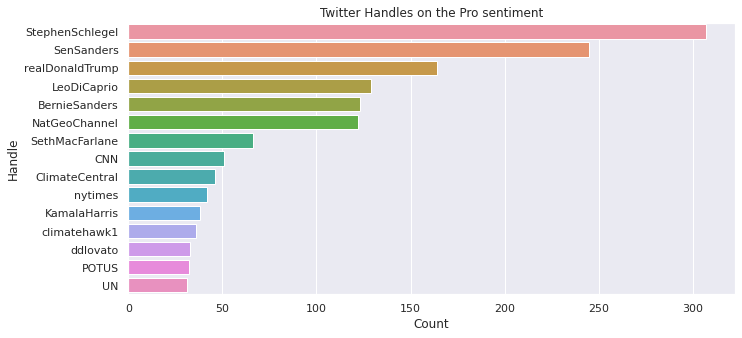

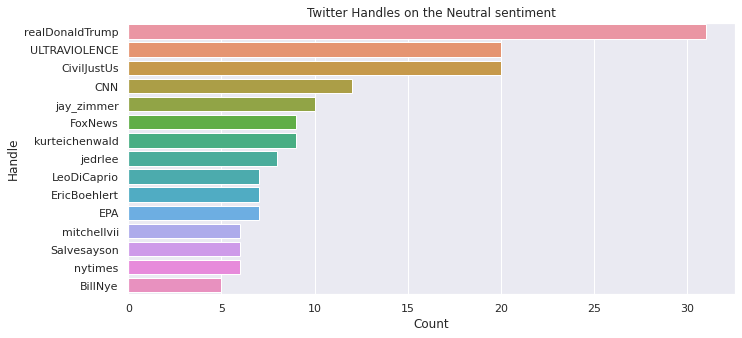

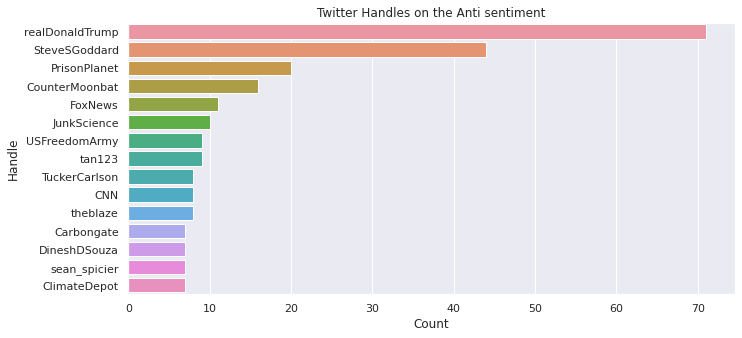

In [35]:
# Extracting handles from tweets
news_h = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_h = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_h = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_h = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# handle lists 
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []),
           sum(anti_h, [])]

# Visualising the Handles
full_title = ['Twitter Handles on the News sentiment',
              'Twitter Handles on the Pro sentiment',
              'Twitter Handles on the Neutral sentiment',
              'Twitter Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

**Observations**

From the Visuals above we can all that ...
* The most popular News handles are actual news broadcaster accounts
* The most popular Pro handles seem to be celebrity accounts & news accounts.
* Trump features most for most popular Anti & Neutral tweets.

# 4. Data preprocessing

In [36]:
df = train.copy() #make copy of Train DataFrame
df1 = test.copy() #make copy of test Dataframe

In [37]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### a. Removing Contractions

Contractions are words or combinations of words which are shortened by dropping letters and replacing them by an apostrophe.

For examples: we’re = we are; we’ve = we have; I’d = I would

In NLP we have to deal with contrctiobs because:

A computer does not know that contractions are abbreviations for a sequence of words. Therefore, a computer considers we’re and we are to be two completely different things and does not recognize that these two terms have the exact same meaning.

Contractions increase the dimensionality of the document-term matrix

Therefore contractions will be removed from the message column in the DataFrame

In [38]:
#Removing the contractions for both the train and Train DataFrames

#Remove contractions on Train Dataset
df['message'] = df['message'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['message'] = [' '.join(map(str, l)) for l in df['message']]

#Remove Contractions on Test Dataset
df1['message'] = df1['message'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df1['message'] = [' '.join(map(str, l)) for l in df1['message']]

df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief does not think carbon d...,625221
1,1,it is not like we lack evidence of anthropogen...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: it is 2016, and a racist,...",466954


### b. Remove non-english tweets

When models are trained, they are often unable to distiguish a language change. 

In [39]:
def detect_language(tweet):
    """
    This function detects the different lanuages written in the tweets,
    to make it easy to remove the other laguages 
    """
    return detect(tweet)

# Language Detection
df['language'] = df['message'].apply(detect_language)

In [40]:
# Creating a new dataframe that will show the language type and how many tweets are in that lanugauage 
lang= df['language'].value_counts()
lang_df = pd.DataFrame({'ISO Code':lang.index, 'Rows':lang.values})
lang_df.set_index('ISO Code', inplace=True)
lang_df.head() #Showcasing the first 5

,Rows
ISO Code,
en,15655
id,26
it,23
fr,22
tl,19


We are able to notice that in our train data there is non english strings. This includes id which is Bahasa Indonesia, it which is Italiano and fr which is français, langue française. The question is do we drop the non-engish words or do we translate them? Or is it better to leave it as it?

According to 'toward Data Science' translation is not a good option for sentiment analysis, it causes a drop in accuracy of 16%. For sentiment analysis stop words and word embeddings are useful. 

So we tested out the different of f1 scores if we were to leave the non-english tweets as compared to dropping them in the test dataset

In [41]:
mydicta = {'Logistic Regression': ['0.70542', '0.71194'],
          'Support Vector Classifier': ['0.71728', '0.72072'],
          'Linear SVC': ['0.72083', '0.72107'],
          'XGBoost': ['0.67804', '0.68847']
         }
p = pd.DataFrame(mydicta.items(), columns=['Model', 'F-1 Score'])
p

,Model,F-1 Score
0,Logistic Regression,"[0.70542, 0.71194]"
1,Support Vector Classifier,"[0.71728, 0.72072]"
2,Linear SVC,"[0.72083, 0.72107]"
3,XGBoost,"[0.67804, 0.68847]"


To our suprise, the four models we did this test on all performed better when we did not drop the non-english coloumns. This could because it meant that the model had more data to train on. Therefore, we concluded with not dropping any columns.

### c. Cleaning Tweets

The DataFrame will be further cleaned to remove noise, this includes entities such as mentions, url's, hashtags, numbers, punctuation, emojis/characters, ascii's and whitespaces.

In [42]:
def Cleantweet (tweet):
    """
    This function will remove the noises from the DataFrame which include removing: mentions, urls,
    hashtags, numbers, punctuations, emojis/characters, acsii's and white spaces. 
    
    Before the function removes noise entities, it will convert the strings into lowercase
    
    Input is datatype 'str': tweet (noisy tweet)
    
    Output is datatype 'str': tweet (cleaned tweet)
    """
        
    #convert to lowercase
    tweet = tweet.lower()
    
    #remove mentions 
    tweet = re.sub('@[\w]*','',tweet)
    
    #remove urls
    tweet = re.split('https:\/\/.*', str(tweet))[0]
    
    #remove hashtags
    tweet = re.sub(r'#\w*','', tweet)
    
    #remove numbers 
    tweet = re.sub(r'\d+','', tweet)
    
    #remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    #remove emojis 
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    tweet = regrex_pattern.sub(r'', tweet)
    
     #remove acsii
    tweet = unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    #remove extra whitespaces 
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    #remove space in front of tweet
    tweet = tweet.lstrip(' ')
    
    return tweet 

In [43]:
#Pass the message column of the dataframe through the Cleantweet function 
df['message'] = df['message'].apply(Cleantweet)
df1['message'] = df1['message'].apply(Cleantweet)
df.head()

,sentiment,message,tweetid,language
0,1,polyscimajor epa chief does not think carbon d...,625221,en
1,1,it is not like we lack evidence of anthropogen...,126103,en
2,2,rt researchers say we have three years to act ...,698562,en
3,1,wired was a pivotal year in the war on climate...,573736,en
4,1,rt it is and a racist sexist climate change de...,466954,en


### Parts of speech tagging and lemmatization

Part-of-Speech tagging is a well-known task in Natural Language Processing. It refers to the process of classifying words into their parts of speech (also known as words classes or lexical categories). This is a supervised learning approach.

The PoS of a word is important to properly obtain the word’s lemma, which is the canonical form of a word (this happens by removing time and grade variation, in English).

For example, what is the canonical form of “living”? “to live” or “living”? It depends semantically on the context and, syntactically, on the PoS of “living”. If “living” is an adjective (like in “living being” or “living room”), we have base form “living”. If it is a noun (“he does it for living”) it is also “living”. But if it is a verb (“he has been living here”), it is “lo live”. This is an example of a situation where PoS matters.

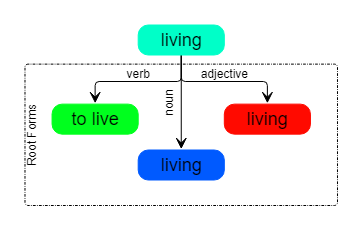

Considering these uses, you would then use PoS Tagging when there’s a need to normalize text in a more intelligent manner (the above example would not be distinctly normalized using a Stemmer) or to extract information based on word PoS tag. 

Tiago Duque (2020): Building a Part of Speech Tagger

Therefore, documents are going to use different forms of a word, such as organize, organizes, and organizing. 

The goal of lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. 

For instance:

The result of this mapping of text will be something like:
the boy's cars are different colors $\Rightarrow$ the boy car be differ color

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. 

In [44]:
def lemmatization(df):
    """
    This function will tokenized the message column, 
    then assign a part of speech tag before lemmatization
    
    Input is datatype dataframe
    
    Output is datatype dataframe
    """
    
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)
    
    
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
        
    df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]
    return df
    

In [45]:
# Lemmatise tweets
df = lemmatization(df)
df1 = lemmatization(df1)
df.head()

,sentiment,message,tweetid,language,tokenized,pos_tags,wordnet_pos,lemmatized
0,1,polyscimajor epa chief does not think carbon d...,625221,en,"[polyscimajor, epa, chief, does, not, think, c...","[(polyscimajor, JJ), (epa, NN), (chief, NN), (...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief do not think carbon dio...
1,1,it is not like we lack evidence of anthropogen...,126103,en,"[it, is, not, like, we, lack, evidence, of, an...","[(it, PRP), (is, VBZ), (not, RB), (like, IN), ...","[(it, n), (is, v), (not, r), (like, n), (we, n...",it be not like we lack evidence of anthropogen...
2,2,rt researchers say we have three years to act ...,698562,en,"[rt, researchers, say, we, have, three, years,...","[(rt, NN), (researchers, NNS), (say, VBP), (we...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,1,wired was a pivotal year in the war on climate...,573736,en,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, VBN), (was, VBD), (a, DT), (pivotal, ...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,1,rt it is and a racist sexist climate change de...,466954,en,"[rt, it, is, and, a, racist, sexist, climate, ...","[(rt, NN), (it, PRP), (is, VBZ), (and, CC), (a...","[(rt, n), (it, n), (is, v), (and, n), (a, n), ...",rt it be and a racist sexist climate change de...


# Converting (HTML) entities:
An HTMLParser instance is fed HTML data and calls handler methods when start tags, end tags, text, comments, and other markup elements are encountered. Removal of words in our data like '&amp', '&lt' (which are basically used in HTML).

In [46]:
html_parser = HTMLParser()

df['messages'] = df['lemmatized'].apply(lambda x: html_parser.unescape(x))
df.head()

,sentiment,message,tweetid,language,tokenized,pos_tags,wordnet_pos,lemmatized,messages
0,1,polyscimajor epa chief does not think carbon d...,625221,en,"[polyscimajor, epa, chief, does, not, think, c...","[(polyscimajor, JJ), (epa, NN), (chief, NN), (...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief do not think carbon dio...,polyscimajor epa chief do not think carbon dio...
1,1,it is not like we lack evidence of anthropogen...,126103,en,"[it, is, not, like, we, lack, evidence, of, an...","[(it, PRP), (is, VBZ), (not, RB), (like, IN), ...","[(it, n), (is, v), (not, r), (like, n), (we, n...",it be not like we lack evidence of anthropogen...,it be not like we lack evidence of anthropogen...
2,2,rt researchers say we have three years to act ...,698562,en,"[rt, researchers, say, we, have, three, years,...","[(rt, NN), (researchers, NNS), (say, VBP), (we...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...,rt researcher say we have three year to act on...
3,1,wired was a pivotal year in the war on climate...,573736,en,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, VBN), (was, VBD), (a, DT), (pivotal, ...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...,wire be a pivotal year in the war on climate c...
4,1,rt it is and a racist sexist climate change de...,466954,en,"[rt, it, is, and, a, racist, sexist, climate, ...","[(rt, NN), (it, PRP), (is, VBZ), (and, CC), (a...","[(rt, n), (it, n), (is, v), (and, n), (a, n), ...",rt it be and a racist sexist climate change de...,rt it be and a racist sexist climate change de...


# 5. Analysis of data after cleaning data

### Word cloud 

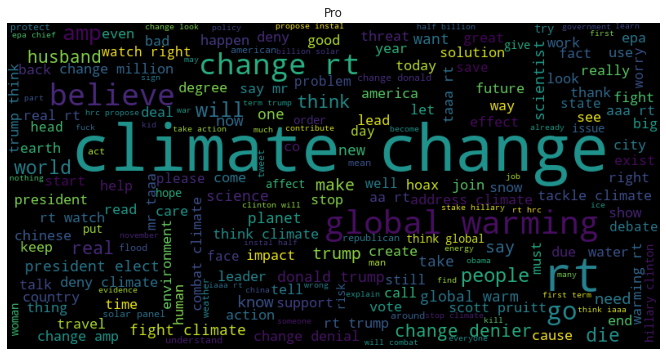

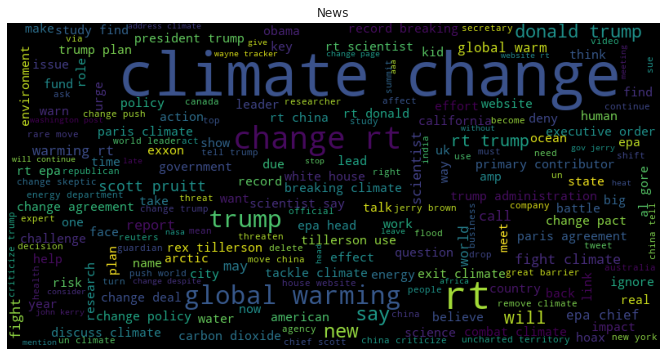

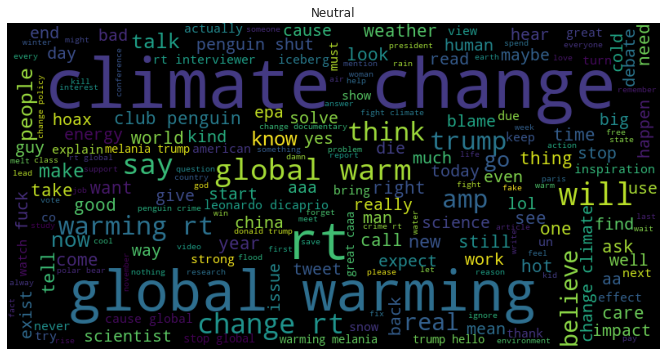

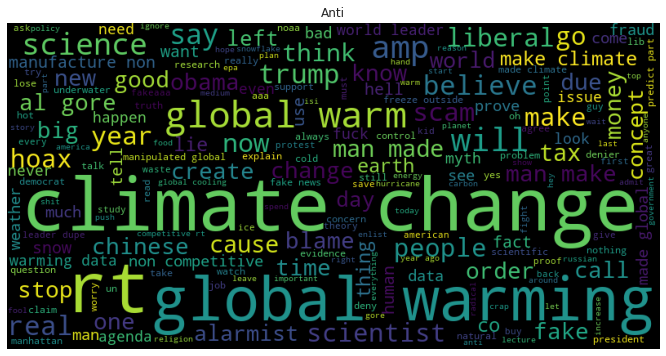

In [47]:
''' We are ploting the wordcloud of a cleaned Data 

    where we removed Noise.'''

# Plot wordcloud for Pro Class
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(df[df['sentiment'] == 1]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Pro')
plt.show()

# Plot for News class
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(df[df['sentiment'] == 2]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('News')
plt.show()

# Plot for Neutral class 
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(df[df['sentiment'] == 0]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Neutral')
plt.show()

#Plot for Anti class 
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(df[df['sentiment'] == -1]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Anti')
plt.show()

**Observations** 

we have now removed the Noise and we are able to see the most common words used in all sentiments being 
* Climate change
* Global Warming
* Trump


# 6. Feauture Engineering

A pipeline will be used to build classification models. 

Classification models: 
* Logistic Regression
* Multinomial Naive Bayes
* Random Forest Classifier
* Support Vector Classifier
* Linear SVC
* K Nearest Neighbours Classifier
* Decision Tree Classifier
* AdaBoost Classifier
* SGD Classifier
* XGBoost

### Validation split
The cleaned train data will be split into feautures and target variables. Then the data will be split into a train and validation set. The purpose of spliting the data into a train and validation set is to be able to evaluate the performance of the models. The evaluation will help choose the best model for submission. 

In [48]:
# Create a copy of the cleaned dataframe with selected columns
f = df[['sentiment', 'lemmatized', 'tweetid']].copy()
f.head()

,sentiment,lemmatized,tweetid
0,1,polyscimajor epa chief do not think carbon dio...,625221
1,1,it be not like we lack evidence of anthropogen...,126103
2,2,rt researcher say we have three year to act on...,698562
3,1,wire be a pivotal year in the war on climate c...,573736
4,1,rt it be and a racist sexist climate change de...,466954


In [49]:
# Seperate features and target variables
X = f['lemmatized']
y = f['sentiment']

# Create train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Pipeline

In the pipeline, first it will vectorize the text data, the fit the model. 

Our feauture variables are still classified as text data (strings). Unforutnatly, machines cannot understand raw text as they only can interpret numerical data. Therefore it is important to vectorize the data. 

> The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents (Jason Brownlee, 2017)

The advatage of the TfidfVectorizer is that the resulting vectors are already scaled. The assigned word frequency scores by the TfidfVectorizer are normalized to values between 0 and 1 and the encoded document vectors can then be used directly with most machine learning algorithms

In [50]:
#Logistic Regression
lr = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', LogisticRegression(random_state=123, 
                                          multi_class='ovr',
                                          n_jobs=1, 
                                          C=1e5,
                                          max_iter = 4000))])
    
    
    
#Multinomial Naive Bayes
multi = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                            smooth_idf = True, 
                                            max_df = 0.3,
                                            ngram_range = (1, 2),
                                            stop_words='english')),
                  ('clf', MultinomialNB())])
    
    
    
#Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', RandomForestClassifier(n_estimators=100, 
                                              max_depth=2, 
                                              random_state=0, 
                                              class_weight="balanced"))])
    
    
#Support Vector Classifier
svc = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                          smooth_idf = True, 
                                          max_df = 0.3,
                                          ngram_range = (1, 2),
                                          stop_words='english')),
                ('clf', SVC(gamma = 0.8, 
                            C = 10, 
                            random_state=42))])
    
    
    
#Linear SVC
linsvc = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                             smooth_idf = True, 
                                             max_df = 0.3,
                                             ngram_range = (1, 2),
                                             stop_words='english')),
                   ('clf', LinearSVC())])
    
    
    
#K Nearest Neighbours Classifier
kn = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', KNeighborsClassifier(n_neighbors=3))])
    
    
    
#Decision Tree Classifier
dt = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', DecisionTreeClassifier(random_state=42))])
    
    
    
#AdaBoost Classifier
ad = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', AdaBoostClassifier(random_state=42))])
    
    
    
#SGD Classifier
sgd = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                          smooth_idf = True, 
                                          max_df = 0.3,
                                          ngram_range = (1, 2),
                                          stop_words='english')),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',
                                      alpha=1e-3, 
                                      random_state=42, 
                                      max_iter=5, 
                                      tol=None))])

    
#XGBoost
xg = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', xgboost.XGBClassifier(learning_rate =0.1,
                                             n_estimators=1000,
                                             max_depth=5, 
                                             min_child_weight=1,
                                             gamma=0,
                                             subsample=0.8,
                                             colsample_bytree=0.8,
                                             nthread=4,
                                             seed=27))])

# 7. Modeling and evaluation

### Train models

In [51]:
# Logistic regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Multinomial Naive Bayes
multi.fit(X_train, y_train)
y_pred_multi = multi.predict(X_test)

# Random Forest Classifier
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Classifier
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Linear SVC
linsvc.fit(X_train, y_train)
y_pred_linsvc = linsvc.predict(X_test)

# K Nearest Neighbours Classifier
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

# Decision Tree Classifier
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# AdaBoost Classifier
ad.fit(X_train, y_train)
y_pred_ad = ad.predict(X_test)

# SGD Classifier
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# XGBoost
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

## a. Logistic Regression

Logistic regression is a statistical model that makes use of a logistic function to model a binary dependent variable, however, multiclass classification with logistic regression can be done through the one-vs-rest scheme in which a separate model is trained for each class to predict whether an observation is that class or not (thus making it a binary classification problem)

In [52]:
start = time.time()
lg_f1 = round(f1_score(y_test, y_pred_lr, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_lr, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_lr, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.7132743362831858
Model Runtime: 0.01 seconds


,precision,recall,f1-score,support
-1,0.642553,0.449405,0.528897,336.000000
0,0.528947,0.367459,0.433657,547.000000
1,0.749488,0.840680,0.792469,2178.000000
2,0.711260,0.713647,0.712451,894.000000
accuracy,0.713274,0.713274,0.713274,0.713274
macro avg,0.658062,0.592797,0.616868,3955.000000
weighted avg,0.701260,0.713274,0.702364,3955.000000


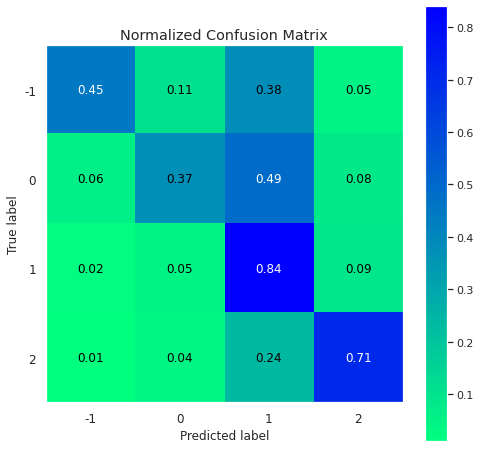

In [53]:
plot_confusion_matrix(y_test, y_pred_lr, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

Logistic regression is able to successfully classify the tweets.
This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class.
The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
There is a drop in the F1 score for the pro climate change class as the predictions become more balanced.
The overall F1 score is 0.71 which is on target. Let's see if we can improve.

## b. Multinomial Naive Bayes

The Multinomial Naive Bayes model estimates the conditional probability of a particular feature given a class and uses a multinomial distribution for each of the features. The model assumes that each feature makes an independent and equal contribution to the outcome

In [54]:
multi_f1 = round(f1_score(y_test, y_pred_multi, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_multi, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_multi, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.6422250316055625
Model Runtime: 2.35 seconds


,precision,recall,f1-score,support
-1,0.928571,0.038690,0.074286,336.000000
0,1.000000,0.060329,0.113793,547.000000
1,0.611478,0.978421,0.752605,2178.000000
2,0.858156,0.406040,0.551253,894.000000
accuracy,0.642225,0.642225,0.642225,0.642225
macro avg,0.849551,0.370870,0.372984,3955.000000
weighted avg,0.747912,0.642225,0.561112,3955.000000


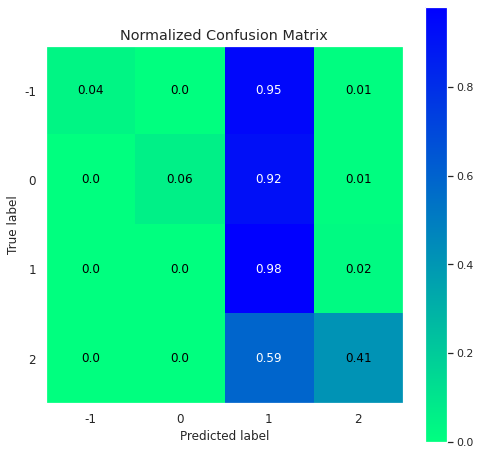

In [55]:
plot_confusion_matrix(y_test, y_pred_multi, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

Although the Naive Bayes model is a slight improvement on the random forest model it still performs poorly
This model classifies most tweets as pro climate change with improved predictions for the news class.
The precision, accuracy and F1 scores have improved significantly for the news class but remain low for neutral and anti.
The overall F1 score is 0.64. Again this score could only be achieved since the majority of tweets are in fact pro climate change

## c. Random Forest Classifier

Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees

In [56]:
rf_f1 = round(f1_score(y_test, y_pred_rf, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_rf, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_rf, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.4265486725663717
Model Runtime: 4.77 seconds


,precision,recall,f1-score,support
-1,0.313008,0.458333,0.371981,336.000000
0,0.308271,0.374771,0.338284,547.000000
1,0.788347,0.304408,0.439218,2178.000000
2,0.339806,0.743848,0.466503,894.000000
accuracy,0.426549,0.426549,0.426549,0.426549
macro avg,0.437358,0.470340,0.403996,3955.000000
weighted avg,0.580177,0.426549,0.425714,3955.000000


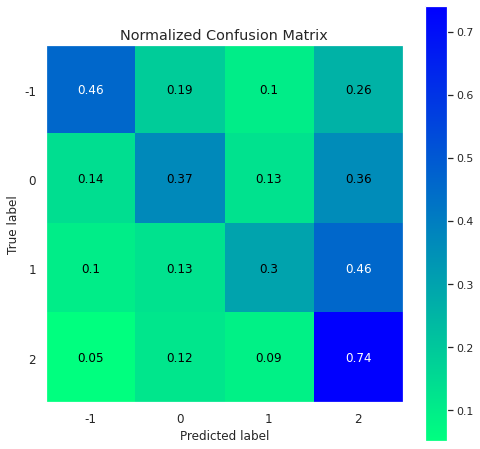

In [57]:
plot_confusion_matrix(y_test, y_pred_rf, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

From the confusion matrix above we notice that the random forest classification model does a very poor job on our data set. The model classifies all the tweets as pro climate change tweets.
This results in precision, recall and F1 scores of zero for the anti, neutral and news classes.
Tree based classification models are especially vulnerable to overfitting when the train data is imbalanced which is the case with our data. The model could be greatly improved by using resampling techniques such as oversampling the anti class and/or undersampling the pro class. This will allow the model to learn how to classify each class equally, improving its accuracy.
The overall F1 score is 0.42. This is a relatively high score for a model that simply classifies all tweets into a single class. This score could only be achieved since the majority of the tweets are in fact pro climate change.

## d. Support Vector Classifier

A Support Vector Classifier is a discriminative classifier formally defined by a separating hyperplane. When labelled training data is passed to the model, also known as supervised learning, the algorithm outputs an optimal hyperplane which categorizes new data.

In [58]:
svc_f1 = round(f1_score(y_test, y_pred_svc, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_svc, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_svc, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.727433628318584
Model Runtime: 7.16 seconds


,precision,recall,f1-score,support
-1,0.720430,0.398810,0.513410,336.000000
0,0.602446,0.360146,0.450801,547.000000
1,0.734811,0.882920,0.802086,2178.000000
2,0.755152,0.696868,0.724840,894.000000
accuracy,0.727434,0.727434,0.727434,0.727434
macro avg,0.703210,0.584686,0.622784,3955.000000
weighted avg,0.719880,0.727434,0.711515,3955.000000


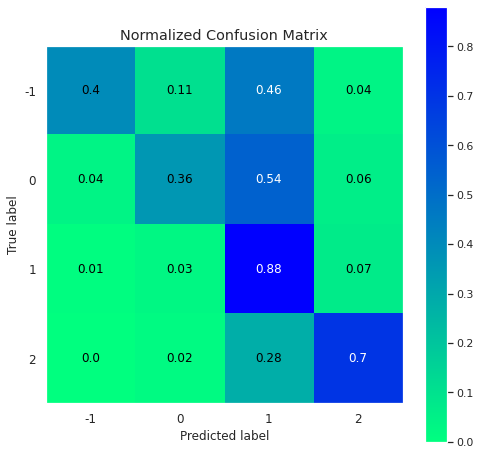

In [59]:
plot_confusion_matrix(y_test, y_pred_svc, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## e. Linear SVC

The objective of a Linear Support Vector Classifier is to return a "best fit" hyperplane that categorises the data. It is similar to SVC with the kernel parameter set to ’linear’, but it is implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and can scale better to large numbers of samples.

In [60]:
linsvc_f1 = round(f1_score(y_test, y_pred_linsvc, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_linsvc, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_linsvc, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.7284450063211125
Model Runtime: 9.07 seconds


,precision,recall,f1-score,support
-1,0.683258,0.449405,0.542190,336.000000
0,0.602941,0.374771,0.462232,547.000000
1,0.755753,0.859504,0.804296,2178.000000
2,0.712105,0.730425,0.721149,894.000000
accuracy,0.728445,0.728445,0.728445,0.728445
macro avg,0.688514,0.603526,0.632467,3955.000000
weighted avg,0.718593,0.728445,0.715925,3955.000000


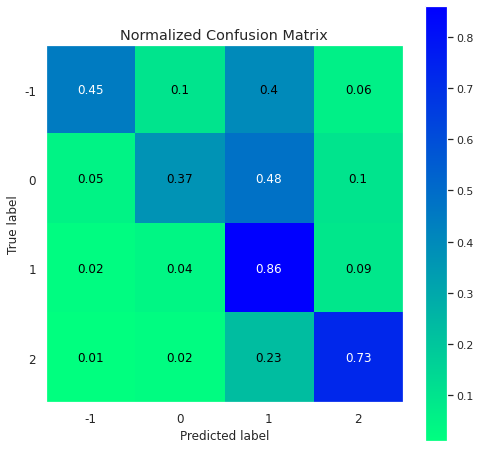

In [61]:
plot_confusion_matrix(y_test, y_pred_linsvc, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

Linear SVC is able to successfully classify the tweets.
This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class compared to the first 3 models.
This model shows a higher degree of confusion surrounding the pro class compared to logistic regression.
This, however, leads to an increase in the precision, accuracy and f1 score for the pro class which makes up the majority of the tweets.
Linear SVC has achieved the highest F1 score of 0.72

## f. K Nearest Neighbours Classifier

The K Neighbours Classifier is a classifier that implements the k-nearest neighbours vote. In classification, the output is a class membership. An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most common among its k-nearest neighbours.

In [62]:
kn_f1 = round(f1_score(y_test, y_pred_kn, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred_kn, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_kn, output_dict=True)
results = pd.DataFrame(report).transpose()
results

accuracy 0.6217446270543616
Model Runtime: 11.54 seconds


,precision,recall,f1-score,support
-1,0.680000,0.101190,0.176166,336.000000
0,0.684211,0.095064,0.166934,547.000000
1,0.598926,0.972911,0.741428,2178.000000
2,0.872852,0.284116,0.428692,894.000000
accuracy,0.621745,0.621745,0.621745,0.621745
macro avg,0.708997,0.363320,0.378305,3955.000000
weighted avg,0.679528,0.621745,0.543258,3955.000000


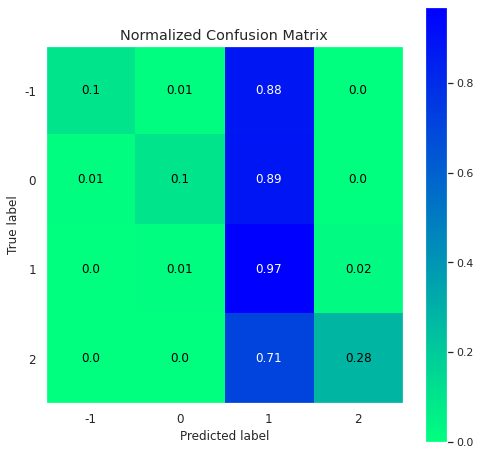

In [63]:
plot_confusion_matrix(y_test, y_pred_kn, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## g. Decision Tree Classifier

Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree.

In [64]:
dt_f1 = round(f1_score(y_test, y_pred_dt, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred_dt, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_dt, output_dict=True)
pd.DataFrame(report).transpose()

accuracy 0.6116308470290771
Model Runtime: 13.45 seconds


,precision,recall,f1-score,support
-1,0.429245,0.270833,0.332117,336.000000
0,0.364341,0.429616,0.394295,547.000000
1,0.724350,0.703398,0.713720,2178.000000
2,0.570702,0.627517,0.597762,894.000000
accuracy,0.611631,0.611631,0.611631,0.611631
macro avg,0.522160,0.507841,0.509474,3955.000000
weighted avg,0.614757,0.611631,0.610911,3955.000000


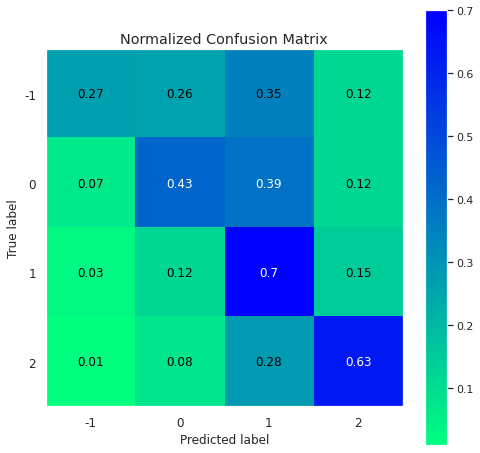

In [65]:
plot_confusion_matrix(y_test, y_pred_dt, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

**Observations:**

## h. AdaBoost Classifier

The AdaBoost classifier is an iterative ensemble method that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset. In the second step, the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [66]:
ad_f1 = round(f1_score(y_test, y_pred_ad, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred_ad, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_ad, output_dict=True)
pd.DataFrame(report).transpose()

accuracy 0.6207332490518331
Model Runtime: 16.03 seconds


,precision,recall,f1-score,support
-1,0.602740,0.261905,0.365145,336.000000
0,0.478571,0.244973,0.324063,547.000000
1,0.646643,0.840220,0.730831,2178.000000
2,0.576538,0.450783,0.505964,894.000000
accuracy,0.620733,0.620733,0.620733,0.620733
macro avg,0.576123,0.449470,0.481501,3955.000000
weighted avg,0.603821,0.620733,0.592676,3955.000000


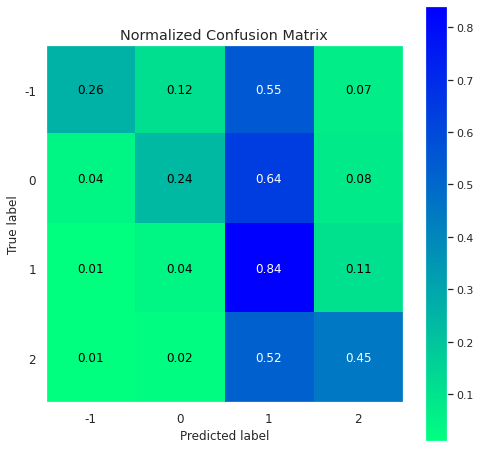

In [67]:
plot_confusion_matrix(y_test, y_pred_ad, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## I. SGD Classifier

SGD is a simple,efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It has received a considerable amount of attention just recently in the context of large-scale learning

In [68]:
sgd_f1 = round(f1_score(y_test, y_pred_sgd, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_sgd, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_sgd, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.6085967130214918
Model Runtime: 18.06 seconds


,precision,recall,f1-score,support
-1,0.863636,0.056548,0.106145,336.000000
0,0.861538,0.102377,0.183007,547.000000
1,0.589237,0.985308,0.737457,2178.000000
2,0.823009,0.208054,0.332143,894.000000
accuracy,0.608597,0.608597,0.608597,0.608597
macro avg,0.784355,0.338071,0.339688,3955.000000
weighted avg,0.703052,0.608597,0.515521,3955.000000


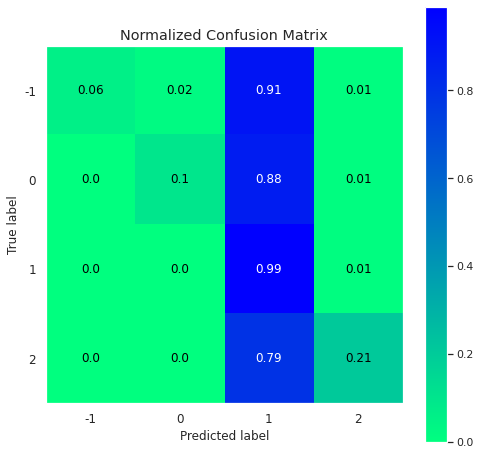

In [69]:
plot_confusion_matrix(y_test, y_pred_sgd, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## XGBoost


In [70]:
xg_f1 = round(f1_score(y_test, y_pred_xg, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred_xg, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_xg, output_dict=True)
pd.DataFrame(report).transpose()

accuracy 0.6884955752212389
Model Runtime: 20.05 seconds


,precision,recall,f1-score,support
-1,0.657754,0.366071,0.470363,336.000000
0,0.479911,0.393053,0.432161,547.000000
1,0.740570,0.811295,0.774321,2178.000000
2,0.661670,0.691275,0.676149,894.000000
accuracy,0.688496,0.688496,0.688496,0.688496
macro avg,0.634976,0.565424,0.588248,3955.000000
weighted avg,0.679649,0.688496,0.678984,3955.000000


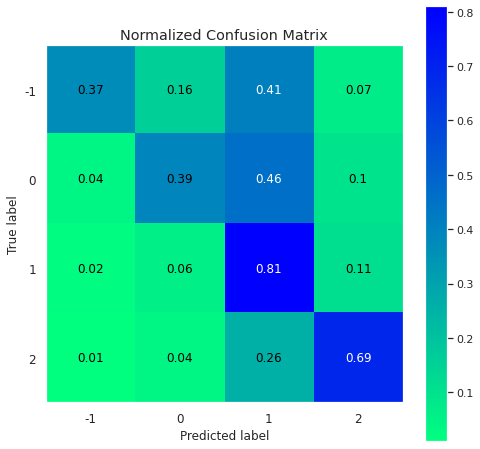

In [71]:
plot_confusion_matrix(y_test, y_pred_xg, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### F1-Score results

In [72]:
mydict = {f'Logistic Regression': lg_f1,
          f'Multinomial Naive Bayes': multi_f1,
          f'Random Forest Classifier': rf_f1,
          f'Support Vector Classifier': svc_f1,
          f'Linear SVC': linsvc_f1,
          f'K Nearest Neighbours Classifier': kn_f1,
          f'Decision Tree Classifier': dt_f1,
          f'AdaBoost Classifier': ad_f1,
          f'SGD Classifier': sgd_f1,
          f'XGBoost': xg_f1
         }

f1 = pd.DataFrame(mydict.items(), columns=['Model', 'F-1 Score'])
f1

,Model,F-1 Score
0,Logistic Regression,0.70
1,Multinomial Naive Bayes,0.56
2,Random Forest Classifier,0.43
3,Support Vector Classifier,0.71
4,Linear SVC,0.72
5,K Nearest Neighbours Classifier,0.54
6,Decision Tree Classifier,0.61
7,AdaBoost Classifier,0.59
8,SGD Classifier,0.52
9,XGBoost,0.68


#### Summary 

From the performance metrics, we see that the **Linear SVC** performed the best on our training, closely followed by the ** SVC** and **Logistic Regression** models. The K Neighbours Classifier significantly performed the worst, which may be due to the k value that was selected for the model. To ensure that we get a robust measure of classifier performance, we will apply cross validation and hyperparameter tuning on the top performing models.

# 8. Imbalanced Classification

### SMOTE

In [73]:
# counting the number of rows in the sentiment 
rows = train1['sentiment'].value_counts()
rows_df = pd.DataFrame({'Sentiment':rows.index, 'Rows':rows.values})

# percentage of each sentiment 
percent = round(train1['sentiment'].value_counts(normalize=True)*100,2)
percentage = pd.DataFrame({'Sentiment':percent.index,
                              'Percentage':percent.values})

#sentiment rows and percentage combined.
sentiment_df = pd.merge(rows_df, percentage, on='Sentiment', how='outer')
sentiment_df.set_index('Sentiment', inplace=True)
sentiment_df.sort_index(axis = 0)

,Rows,Percentage
Sentiment,,
-1,1296,8.19
0,2353,14.87
1,8530,53.92
2,3640,23.01


**Observation:**

Sentiment class 1 has majority (53.92%) of sentiments in the train data set which is Pro climate change and the remaining 46% is shared amongst the three other classes. This imbalance indicates how biased our model might be thus exploring resampling techniques might be required in order to improve the model accuracy.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

> SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

> Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

> This procedure can be used to create as many synthetic examples for the minority class as are required.

> A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

In [74]:
smote = SMOTE()

In [75]:
vectorizer = TfidfVectorizer(sublinear_tf=True, 
                             smooth_idf = True, 
                             max_df = 0.3,
                             ngram_range = (1, 2),
                             stop_words='english')
X_vector = vectorizer.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.25, random_state=42)

In [77]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

In [78]:
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))

Before SMOTE: Counter({1: 6352, 2: 2746, 0: 1806, -1: 960})
After SMOTE: Counter({-1: 6352, 1: 6352, 0: 6352, 2: 6352})


### Logistic Regression

In [79]:
start = time.time()
logr = LogisticRegression(random_state=123, 
                                  multi_class='ovr',
                                  n_jobs=1, 
                                  C=1e5,
                                  max_iter = 4000)
logr.fit(X_train_smote, y_train_smote)
y_pred_logr = logr.predict(X_test)
logr_f1 = round(f1_score(y_test, y_pred_logr, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_logr, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_logr, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.6298356510745892
Model Runtime: 195.61 seconds


,precision,recall,f1-score,support
-1,0.367159,0.592262,0.453303,336.000000
0,0.387697,0.495430,0.434992,547.000000
1,0.817853,0.622590,0.706986,2178.000000
2,0.629735,0.743848,0.682051,894.000000
accuracy,0.629836,0.629836,0.629836,0.629836
macro avg,0.550611,0.613532,0.569333,3955.000000
weighted avg,0.677548,0.629836,0.642180,3955.000000


### Support Vector Classifier

In [80]:
svc_smote = SVC(gamma = 0.8, C = 10, random_state=42)
svc_smote.fit(X_train_smote, y_train_smote)
y_pred_svc_smote = svc_smote.predict(X_test)
svc_smote_f1 = round(f1_score(y_test, y_pred_svc_smote, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_svc_smote, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_svc_smote, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.716055625790139
Model Runtime: 322.78 seconds


,precision,recall,f1-score,support
-1,0.838095,0.261905,0.399093,336.000000
0,0.619433,0.279707,0.385390,547.000000
1,0.695967,0.926997,0.795038,2178.000000
2,0.814815,0.639821,0.716792,894.000000
accuracy,0.716056,0.716056,0.716056,0.716056
macro avg,0.742078,0.527108,0.574078,3955.000000
weighted avg,0.724321,0.716056,0.687057,3955.000000


### Linear SVC

In [81]:
lsvc = LinearSVC()
lsvc.fit(X_train_smote, y_train_smote)
y_pred_lsvc = lsvc.predict(X_test)
lsvc_f1 = round(f1_score(y_test, y_pred_lsvc, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred_lsvc, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_lsvc, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.7097345132743362
Model Runtime: 324.96 seconds


,precision,recall,f1-score,support
-1,0.537572,0.553571,0.545455,336.000000
0,0.486381,0.457038,0.471254,547.000000
1,0.801896,0.776860,0.789179,2178.000000
2,0.689340,0.759508,0.722725,894.000000
accuracy,0.709735,0.709735,0.709735,0.709735
macro avg,0.628797,0.636744,0.632153,3955.000000
weighted avg,0.710360,0.709735,0.709481,3955.000000


### XG Boost

In [82]:
xgb = xgboost.XGBClassifier(learning_rate =0.1,
                                     n_estimators=1000,
                                     max_depth=5, 
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     nthread=4,
                                     seed=27)
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(X_test)
xgb_f1 = round(f1_score(y_test, y_pred_xgb, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred_xgb, y_test))
print("Model Runtime: %0.2f seconds"%((time.time() - start)))
report = classification_report(y_test, y_pred_xgb, output_dict=True)
results = pd.DataFrame(report).transpose()
results

accuracy 0.683944374209861
Model Runtime: 568.16 seconds


,precision,recall,f1-score,support
-1,0.578947,0.491071,0.531401,336.000000
0,0.436834,0.524680,0.476744,547.000000
1,0.788443,0.739210,0.763033,2178.000000
2,0.662204,0.719239,0.689544,894.000000
accuracy,0.683944,0.683944,0.683944,0.683944
macro avg,0.616607,0.618550,0.615181,3955.000000
weighted avg,0.693480,0.683944,0.687148,3955.000000


### F1 Score

In [83]:
mydict = {f'Logistic Regression': [lg_f1, logr_f1],
          f'Support Vector Classifier': [svc_f1, svc_smote_f1], 
          f'Linear SVC': [linsvc_f1, lsvc_f1], 
          f'XGBoost': [xg_f1, xgb_f1]
         }

i = pd.DataFrame(mydict.items(), columns=['Model', 'F-1 Score'])
i

,Model,F-1 Score
0,Logistic Regression,"[0.7, 0.64]"
1,Support Vector Classifier,"[0.71, 0.69]"
2,Linear SVC,"[0.72, 0.71]"
3,XGBoost,"[0.68, 0.69]"


### Downsampling

In [84]:
W = df[['sentiment', 'lemmatized', 'tweetid']].copy()

In [85]:
W.head()

,sentiment,lemmatized,tweetid
0,1,polyscimajor epa chief do not think carbon dio...,625221
1,1,it be not like we lack evidence of anthropogen...,126103
2,2,rt researcher say we have three year to act on...,698562
3,1,wire be a pivotal year in the war on climate c...,573736
4,1,rt it be and a racist sexist climate change de...,466954


In [86]:
train_majority = W[W.sentiment== 1]
train_0 = W[W.sentiment== 0]
train_2 = W[W.sentiment== 2]

train_minority = W[W.sentiment==-1]

In [87]:
# Downsample majority classes
train_majority_downsampled = resample(train_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=1296,     # to match minority class
                                     random_state=123) 


train_0_downsampled = resample(train_0, 
                               replace=False,    
                               n_samples=1296,     
                               random_state=123) 

train_2_downsampled = resample(train_2, 
                               replace=False,    
                               n_samples=1296,     
                               random_state=123) 

                      



# Combine minority class with downsampled majority class
train_downsampled1 = pd.concat([train_0_downsampled,train_2_downsampled])

train_downsampled2 = pd.concat([train_majority_downsampled, train_minority])

train_downsampled =  pd.concat([train_downsampled1, train_downsampled2])

In [88]:
train_downsampled['sentiment'].value_counts()

-1    1296
 2    1296
 1    1296
 0    1296
Name: sentiment, dtype: int64

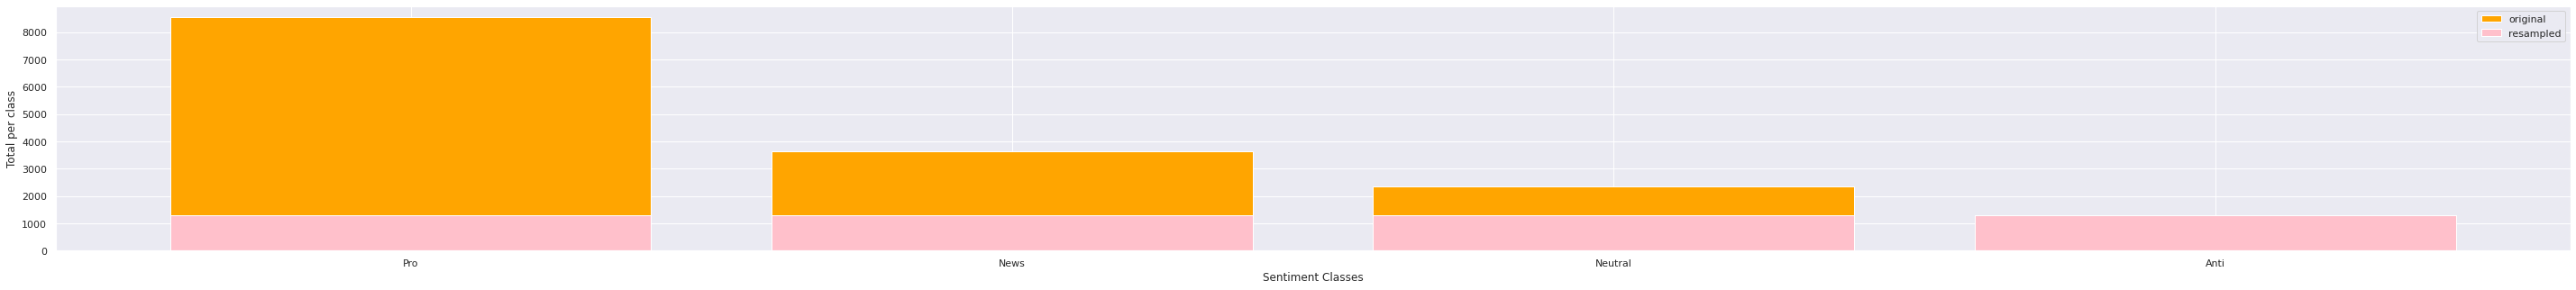

In [89]:
counts = W["sentiment"].value_counts()
counti = train_downsampled['sentiment'].value_counts()

plt.bar(range(len(counts)), counts, color='orange')
plt.bar(range(len(counts)),counti,color='pink')
plt.xticks([0, 1, 2, 3], ['Pro', 'News', 'Neutral', 'Anti'])

plt.ylabel("Total per class")
plt.xlabel("Sentiment Classes")
plt.legend(['original','resampled'])
plt.show()

In [90]:
train_downsampled.head()

,sentiment,lemmatized,tweetid
13470,0,rt be there really a god do global warm exist ...,574574
8148,0,also this storm be global warm maybe probably,761606
11544,0,rt savor ur cold one while you can climate cha...,639609
7282,0,rt i have begin to miss the day of endless pap...,121132
12634,0,omg celebrity moral action on climate change t...,744560


In [91]:
X = train_downsampled['lemmatized']
y = train_downsampled['sentiment']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [93]:
# Logistic regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Support Vector Classifier
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Linear SVC
linsvc.fit(X_train, y_train)
y_pred_linsvc = linsvc.predict(X_test)

# XGBoost
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

In [94]:
lr_f1 = round(f1_score(y_test, y_pred_lr, average='weighted'),2)
svc_f1 = round(f1_score(y_test, y_pred_svc, average='weighted'),2)
linsvc_f1 = round(f1_score(y_test, y_pred_linsvc, average='weighted'),2)
xg_f1 = round(f1_score(y_test, y_pred_xg, average='weighted'),2)

In [95]:
mydict = {f'Logistic Regression': lg_f1,
          f'Support Vector Classifier': svc_f1,
          f'Linear SVC': linsvc_f1,
          f'XGBoost': xg_f1
         }

f1 = pd.DataFrame(mydict.items(), columns=['Model', 'F-1 Score'])
f1

,Model,F-1 Score
0,Logistic Regression,0.70
1,Support Vector Classifier,0.61
2,Linear SVC,0.60
3,XGBoost,0.57


**Obsevations**

We looked at the Resampling and we realised that our F1 score was reduced.

# 9. Hyperparameter Tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned.

In [96]:
X = df['lemmatized']
y = df['sentiment']
vectorizer = TfidfVectorizer(sublinear_tf=True, 
                             smooth_idf = True, 
                             max_df = 0.3,
                             ngram_range = (1, 2),
                             stop_words='english')
X_vector = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.1, random_state = 42)

In [97]:
# Linear SVC model

kfold = StratifiedKFold( n_splits = 20)
#Set the parameters 'C'
param_grid= {'C': [0.1, 0.3, 0.6, 0.9, 0.10]}

# Grid Search on the Linear SVC model
lsc= GridSearchCV(LinearSVC(), param_grid = [param_grid], 
                     verbose = 1, cv =kfold, n_jobs = -1)

# Fitting the model to our data
lsc.fit(X_train, y_train)

# Find the best estimator
lsc_best = lsc.best_estimator_

# Print the best parameters
print(lsc.best_params_)

# Print the best score
print(lsc.best_score_)

Fitting 20 folds for each of 5 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished


{'C': 0.9}
0.7217811201188388


# 11. Submission

### Comet Submission

The first comet submission was made for the models below before resampling,these models gave an F1 score of 0.70 and above, namely:
* Logistic Regression = 0.7
* Support Vector Classifier = 0.71
* Linear SVC = 0.72

After resampling, the **Linear SVC** still gave the best result results and was therefore kept as the model for the final experiment.

In [98]:
# Dictionary for the data to log for Linear SVC

params = {'test_size':0.25,
          'random_state': 42,
          'model_type': 'Linear SVC'}
metrics = {'f1_score': linsvc_f1}

In [99]:
# Log the parameters and results for the Linear SVC model

experiment.log_parameters(params)
experiment.log_parameters(metrics)

In [100]:
# End the experiment for the Linear SVC experiment
experiment.end()

### Kaggle Submission

In [101]:
df1.head()

,message,tweetid,tokenized,pos_tags,wordnet_pos,lemmatized
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[(europe, NN), (will, MD), (now, RB), (be, VB)...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[(combine, NN), (this, DT), (with, IN), (the, ...","[(combine, n), (this, n), (with, n), (the, n),...",combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[(the, DT), (scary, JJ), (unimpeachable, JJ), ...","[(the, n), (scary, a), (unimpeachable, a), (ev...",the scary unimpeachable evidence that climate ...
3,putin got to you too jill trump does not belie...,476263,"[putin, got, to, you, too, jill, trump, does, ...","[(putin, NN), (got, VBD), (to, TO), (you, PRP)...","[(putin, n), (got, v), (to, n), (you, n), (too...",putin get to you too jill trump do not believe...
4,rt female orgasms because global warming -sarc...,872928,"[rt, female, orgasms, because, global, warming...","[(rt, JJ), (female, NN), (orgasms, NN), (becau...","[(rt, a), (female, n), (orgasms, n), (because,...",rt female orgasm because global warm -sarcasti...


In [102]:
test1 = df1.copy()
test1

,message,tweetid,tokenized,pos_tags,wordnet_pos,lemmatized
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[(europe, NN), (will, MD), (now, RB), (be, VB)...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[(combine, NN), (this, DT), (with, IN), (the, ...","[(combine, n), (this, n), (with, n), (the, n),...",combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[(the, DT), (scary, JJ), (unimpeachable, JJ), ...","[(the, n), (scary, a), (unimpeachable, a), (ev...",the scary unimpeachable evidence that climate ...
3,putin got to you too jill trump does not belie...,476263,"[putin, got, to, you, too, jill, trump, does, ...","[(putin, NN), (got, VBD), (to, TO), (you, PRP)...","[(putin, n), (got, v), (to, n), (you, n), (too...",putin get to you too jill trump do not believe...
4,rt female orgasms because global warming -sarc...,872928,"[rt, female, orgasms, because, global, warming...","[(rt, JJ), (female, NN), (orgasms, NN), (becau...","[(rt, a), (female, n), (orgasms, n), (because,...",rt female orgasm because global warm -sarcasti...
...,...,...,...,...,...,...
10541,rt brb writing a poem about climate change,895714,"[rt, brb, writing, a, poem, about, climate, ch...","[(rt, NN), (brb, NN), (writing, VBG), (a, DT),...","[(rt, n), (brb, n), (writing, v), (a, n), (poe...",rt brb write a poem about climate change
10542,the year climate change came home during the h...,875167,"[the, year, climate, change, came, home, durin...","[(the, DT), (year, NN), (climate, NN), (change...","[(the, n), (year, n), (climate, n), (change, n...",the year climate change come home during the h...
10543,rt pacific countries positive about fiji leadi...,78329,"[rt, pacific, countries, positive, about, fiji...","[(rt, NN), (pacific, NN), (countries, NNS), (p...","[(rt, n), (pacific, n), (countries, n), (posit...",rt pacific country positive about fiji lead th...
10544,rt you are so hot you must be the because for ...,867455,"[rt, you, are, so, hot, you, must, be, the, be...","[(rt, NN), (you, PRP), (are, VBP), (so, RB), (...","[(rt, n), (you, n), (are, v), (so, r), (hot, a...",rt you be so hot you must be the because for g...


In [103]:
testx = test1['lemmatized']
test_v = vectorizer.transform(testx)

In [104]:
lsc.fit(X_test,y_test)

Fitting 20 folds for each of 5 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.3, 0.6, 0.9, 0.1]}], verbose=1)

In [105]:
y_pred = lsc.predict(test_v)

In [106]:
test1['sentiment'] = y_pred

In [107]:
y_test_f = lsc.predict(test_v)
output = pd.DataFrame({'tweetid': df1.tweetid,
                        'sentiment':y_test_f})
output.to_csv('submission.csv', index=False)


# 12. Conclusion

Over the years,the use of social media platforms such as Twitter has played a important role in capturing public opinion for various topics which is vital for different organisations. Classifying the sentiments of tweets which pertains to climate change sheds light to different topics and issues associated with climate change. It also allows one to get a grasp of the main concerns of the public. Organisations can gain powerful insights for marketing purposes by using social media & sentiment analysis.

Impact investing is an emerging field that refers to investments made into companies and organisations with the intention to generate measurable social or environmental impact alongside financial return.Our model provides a valuable solution to this problem and can add to their market research efforts in gauging how their product or service may be received. It gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories, thus increasing their insights and informing future marketing strategies.

Based on the findings, the best performing model was the Linear SVC. This model can be used by interested companies to evaluate their clients sentiments towards global warming.